This notebook is to check the (ra,dec) calculation of the gridded placement of the fibers along the major axis of the SGA galaxies.

In [7]:
import numpy as np

from astropy.table import Table

import matplotlib.pyplot as plt
%matplotlib notebook

## Calculate (ra, dec) of major axis end points

We set fiber target locations along the major axis at a distance of $xR_e$, where $x$ varies from 0.5 to 3 in steps of 0.5.

In [27]:
center_ra = np.array([120.566190]) # degrees
center_dec = np.array([37.719561]) # degrees

phi = np.array([143.5])*np.pi/180. # degrees -> radians
#r50 = lg_SGA['uncor_radius']/3600.   # arcsecs -> degrees
d25 = np.array([0.852])/60. # arcmin -> degrees

x = np.linspace(0.25,1.5,6).reshape((1,6))

# Distances along the semi-major axis from the center coordinate for our targets
#delta_a = np.dot(r50.reshape((len(r50),1)),x)
delta_a = 0.5*np.dot(d25.reshape((len(d25),1)),x)
delta_a = delta_a.reshape(6,len(delta_a))

# Target positions
fiber1_ra = center_ra + np.dot(delta_a, np.sin(phi).reshape(len(phi),1))
fiber1_dec = center_dec + np.dot(delta_a, np.cos(phi).reshape(len(phi),1))
fiber2_ra = center_ra - np.dot(delta_a, np.sin(phi).reshape(len(phi),1))
fiber2_dec = center_dec - np.dot(delta_a, np.cos(phi).reshape(len(phi),1))

fiber_ra = np.concatenate((np.ravel(fiber1_ra), np.ravel(fiber2_ra)))
fiber_dec = np.concatenate((np.ravel(fiber1_dec), np.ravel(fiber2_dec)))

<IPython.core.display.Javascript object>


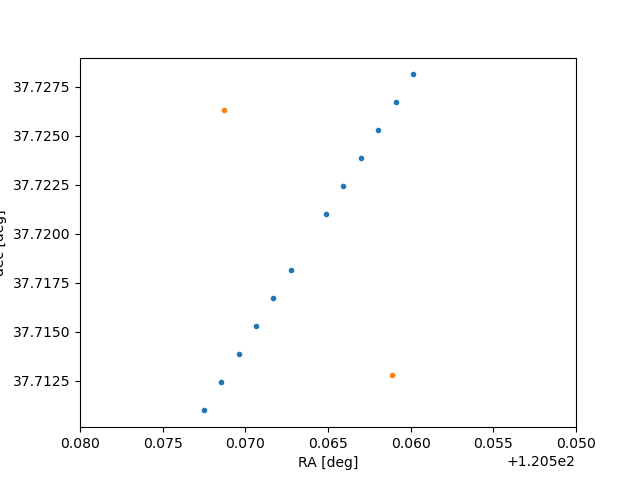

In [32]:
plt.figure()

plt.plot(fiber_ra, fiber_dec, '.')
plt.plot([120.5713, 120.5611], [37.7263, 37.7128], '.')

plt.xlim([120.58, 120.55])

plt.xlabel('RA [deg]')
plt.ylabel('dec [deg]')

plt.tight_layout();

In [29]:
test = Table()

test['RA'] = fiber_ra
test['Dec'] = fiber_dec

test.write('test.fits', format='fits', overwrite=True)